@ Authors:

BRUNO Daniele : https://github.com/dn-lo

FERZOLA Giusy : https://github.com/Giusy12

----------------------------------------------------------------

@ Original from:

LE BORGNE Pierre-Alexis :https://www.kaggle.com/pierra

GUILLAUME Florian : https://www.kaggle.com/florianguillaume


In [94]:
#Importing librairies

import pandas as pd
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split

# Scikit-learn library: For Logistic Regression
from sklearn.linear_model import LogisticRegression

# Scikit-learn library: For Trees
from sklearn import tree

# Scikit-learn library: For KNN
from sklearn.neighbors import KNeighborsClassifier as KNC

# Scikit-learn library: For Random Forest
from sklearn.ensemble import RandomForestClassifier as RF

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn as sns

# Library for imbalanced datasets
import imblearn
from imblearn.over_sampling import SMOTE

%matplotlib inline

# Data recuperation

In [50]:
# Read data
data = pd.read_csv('steel_plates_faults_raw.csv', sep="\t", header=None) # Reading the file .csv
df = pd.DataFrame(data) # Converting data to Panda DataFrame
# Read features and class names
title = pd.read_csv('steel_plates_faults_var.csv', sep="\t", index_col=None, header=None) # Reading the title .csv
dt = pd.DataFrame(title) # Converting data to Panda DataFrame
# Convert names to list and use them as column names of the dataframe
header = dt[0].tolist()
df.columns = header

# Data Visualization

In [51]:
# Names of class labels in dataframe
classNames = ['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']
# Separate dataframe in features and classes
X = df.drop(classNames, axis=1)    # Features
Y = df[classNames]                 # Classes
# Dataframe with Fault as a categorical variable
yl = (Y.iloc[:, :] == 1).idxmax(1).copy().to_frame()
yl.columns = ['Fault']


# Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)
X.describe()


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


### Boxplot

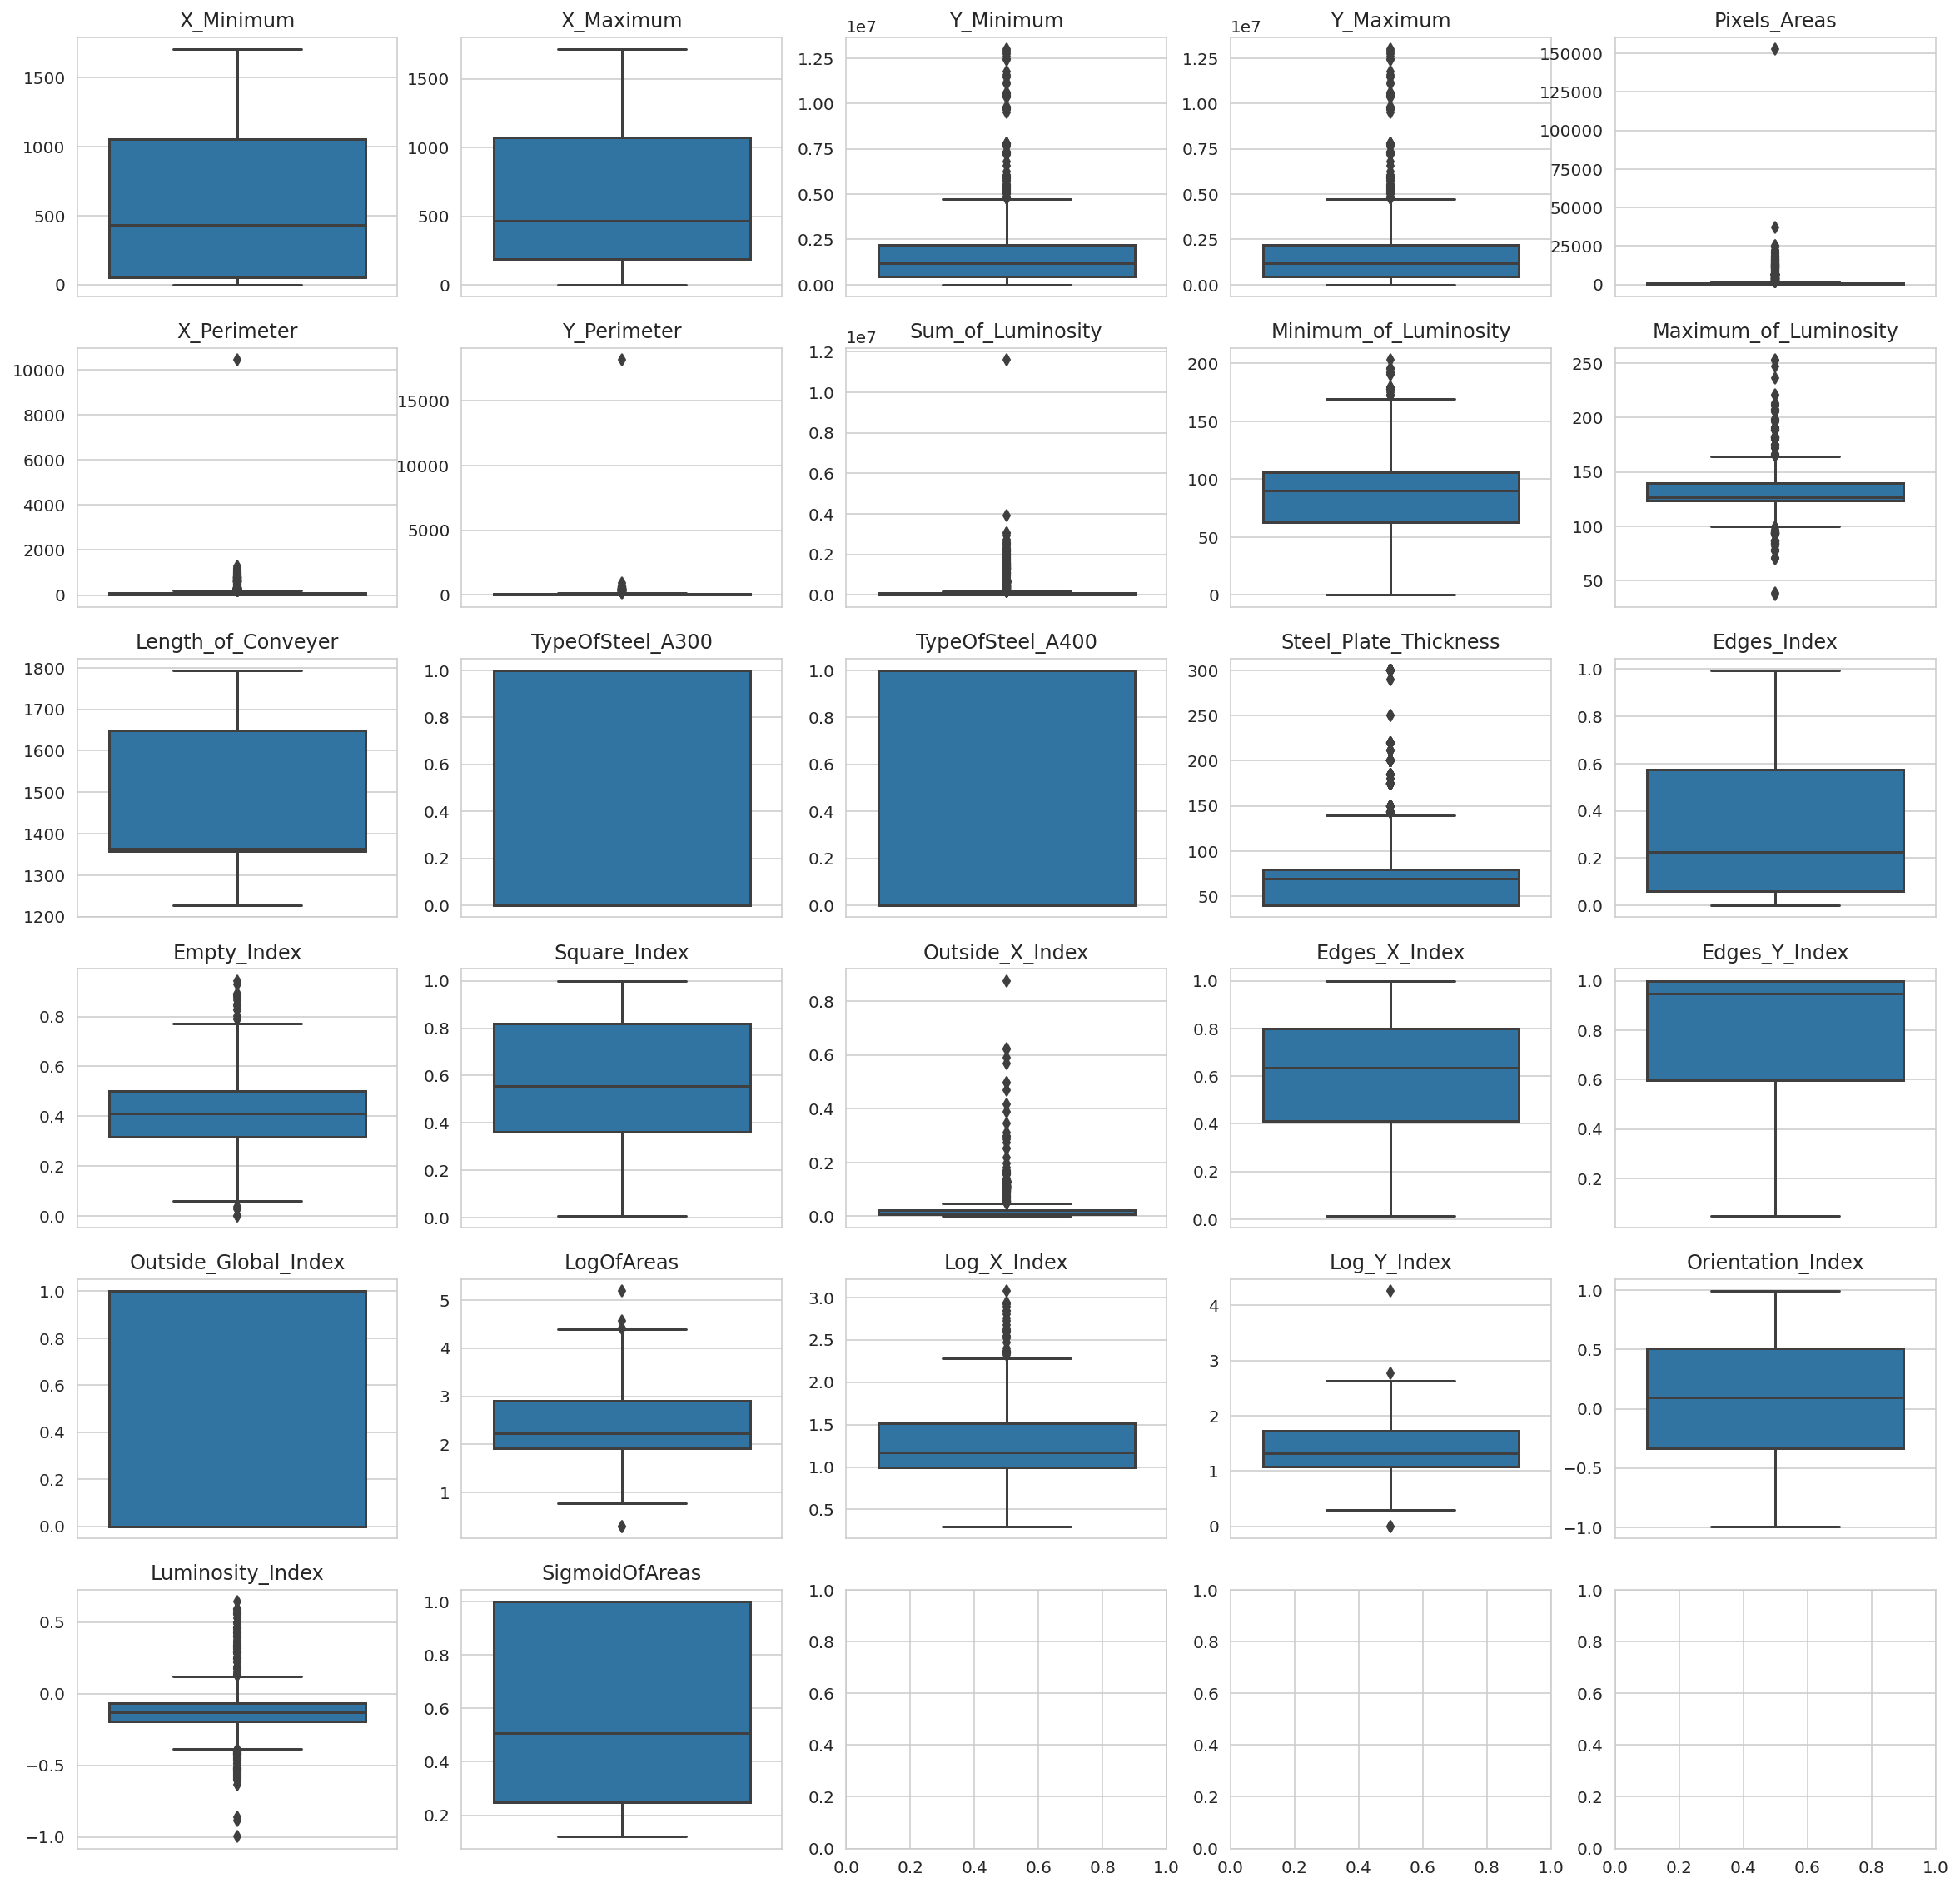

In [4]:
# Features box plot
sns.set_style("whitegrid")
fig, axs = plt.subplots(6, 5, figsize=(20,20))

idx = 0
for ax in axs.ravel():
    sns.boxplot(data=X.iloc[:, idx], ax=ax)
    ax.set_title(X.columns[idx])
    ax.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=False)
    idx +=1
    if idx >= len(X.columns):
        break


Whiskers in the box plot can extend up to 1.5 times the interquartile range, that is the distance between the 25th and 75th percentile. Points outside this range are considered outliers.

### Histograms

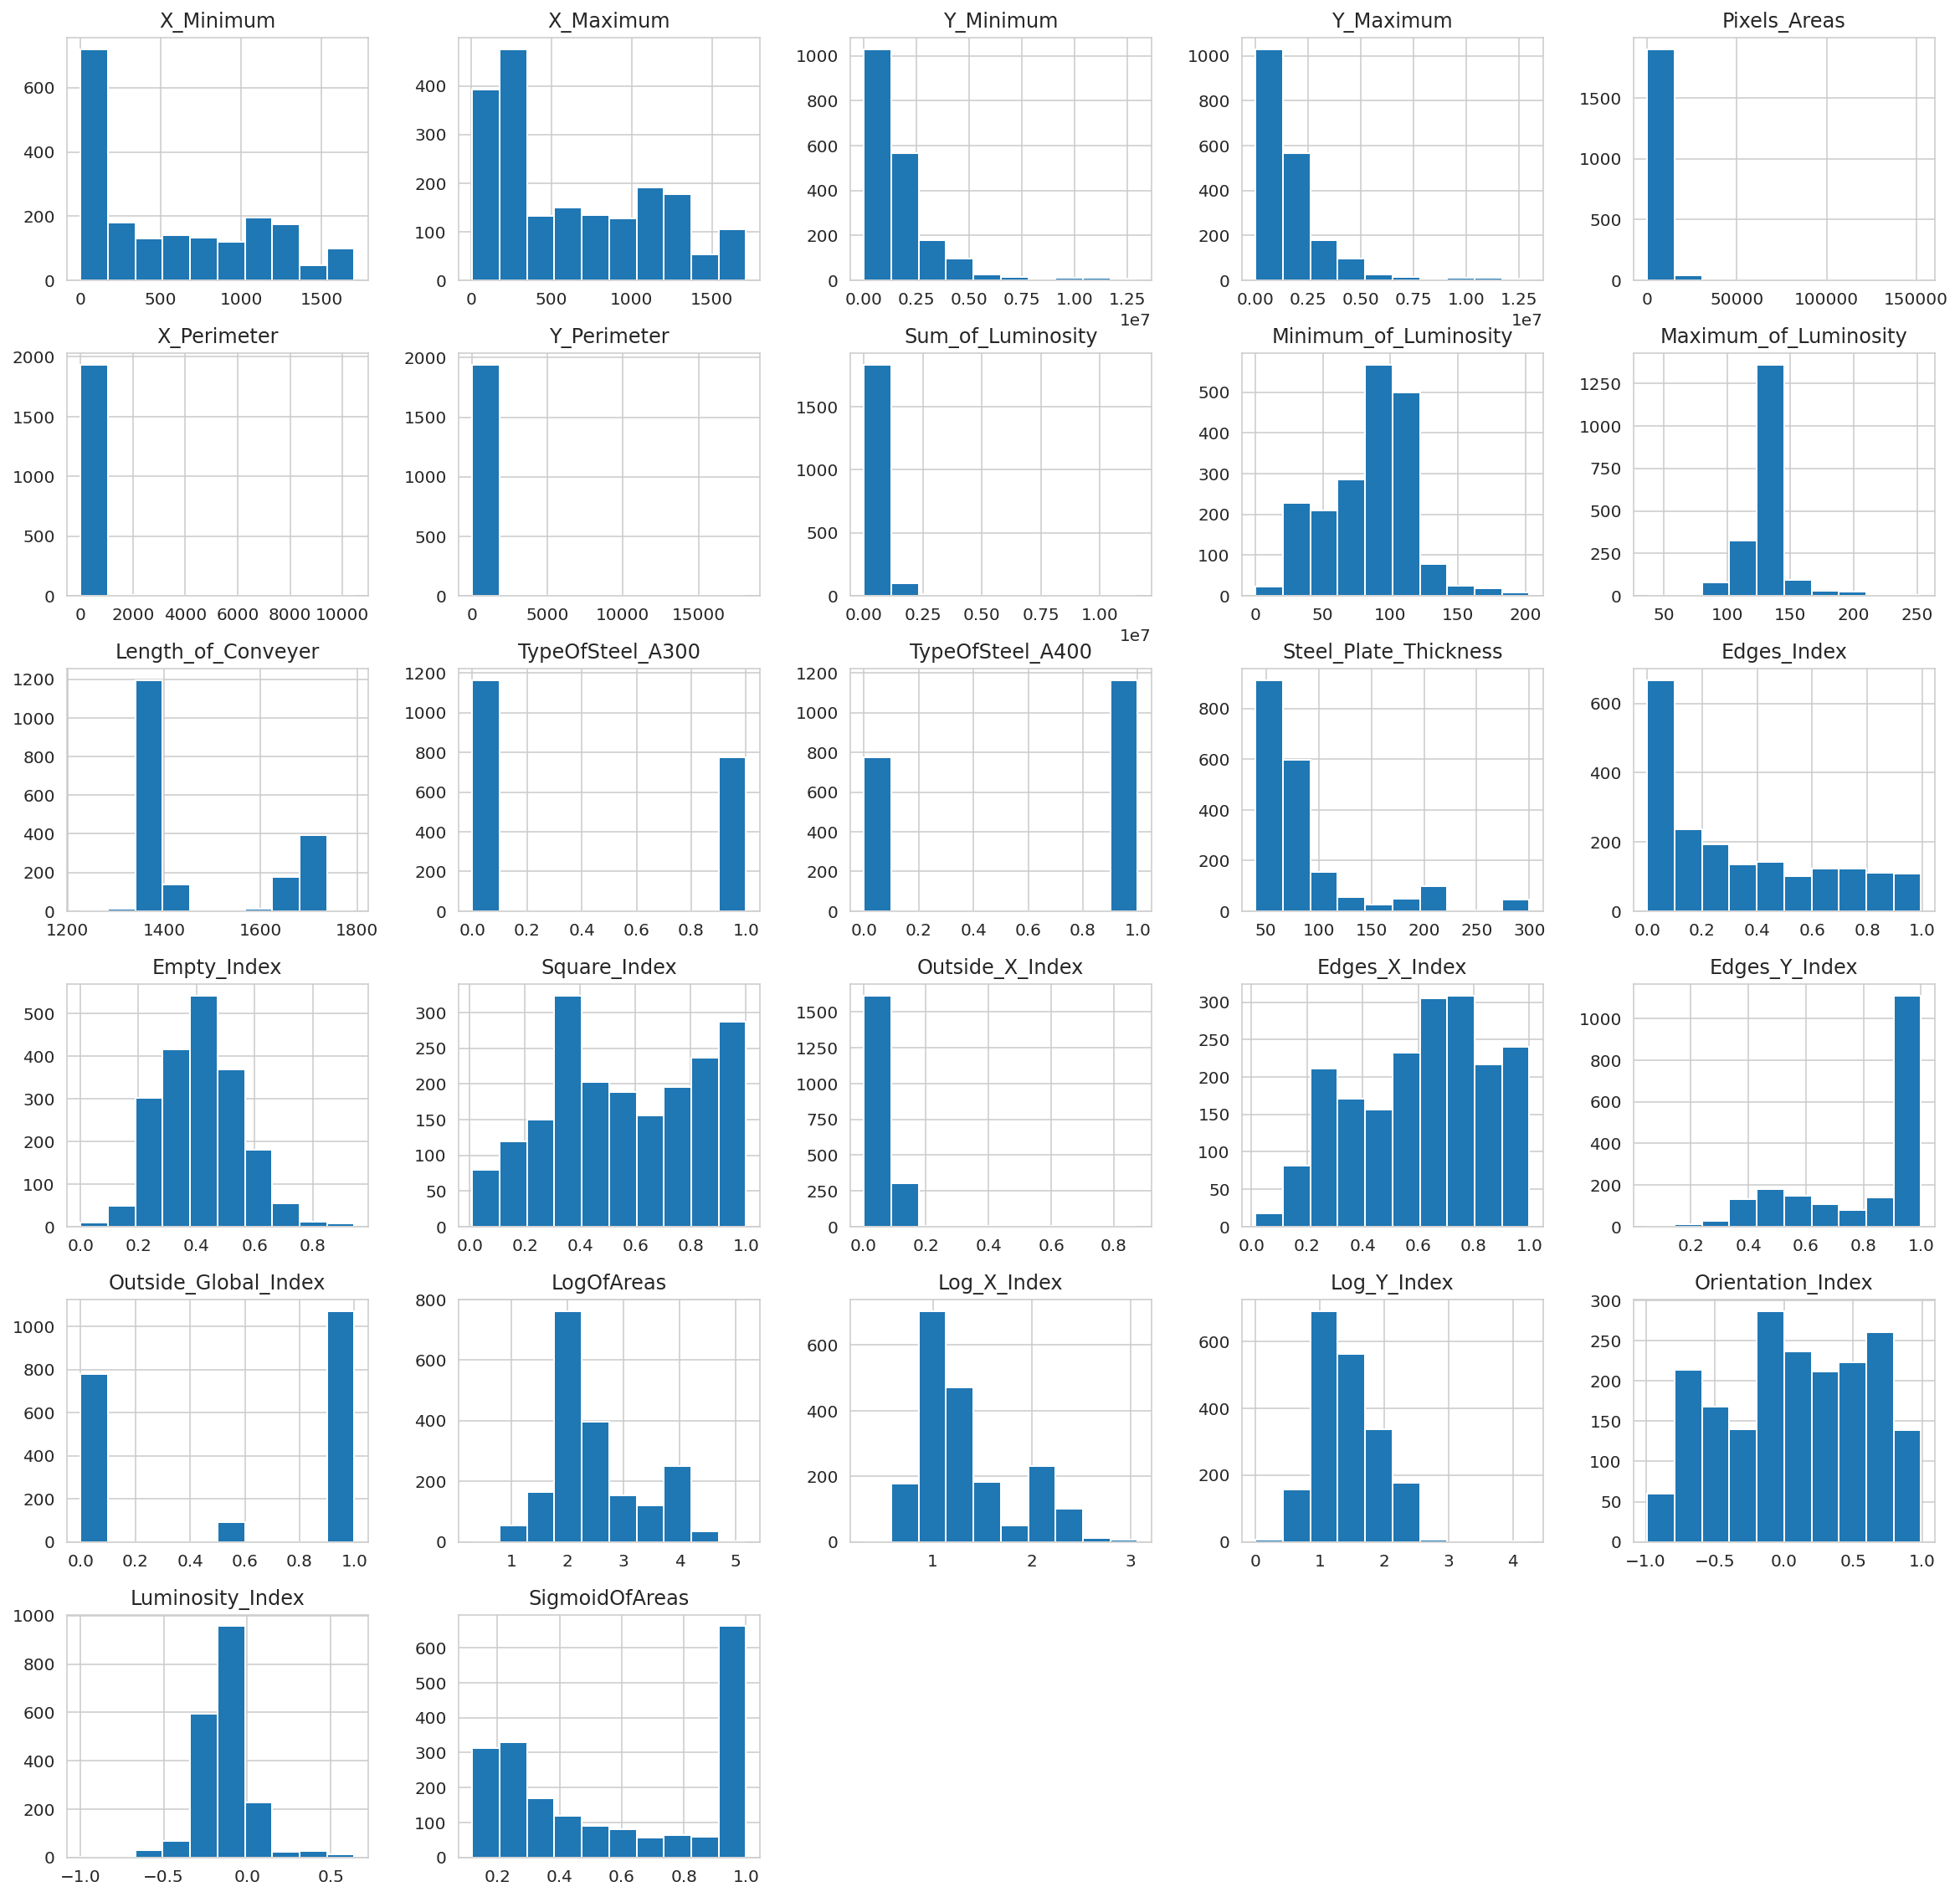

In [5]:
X.hist(figsize=(20,20))
plt.show()

### Unbalanced data

Number of plates with defect Pastry is 158
Number of plates with defect Z_Scratch is 190
Number of plates with defect K_Scatch is 391
Number of plates with defect Stains is 72
Number of plates with defect Dirtiness is 55
Number of plates with defect Bumps is 402
Number of plates with defect Other_Faults is 673


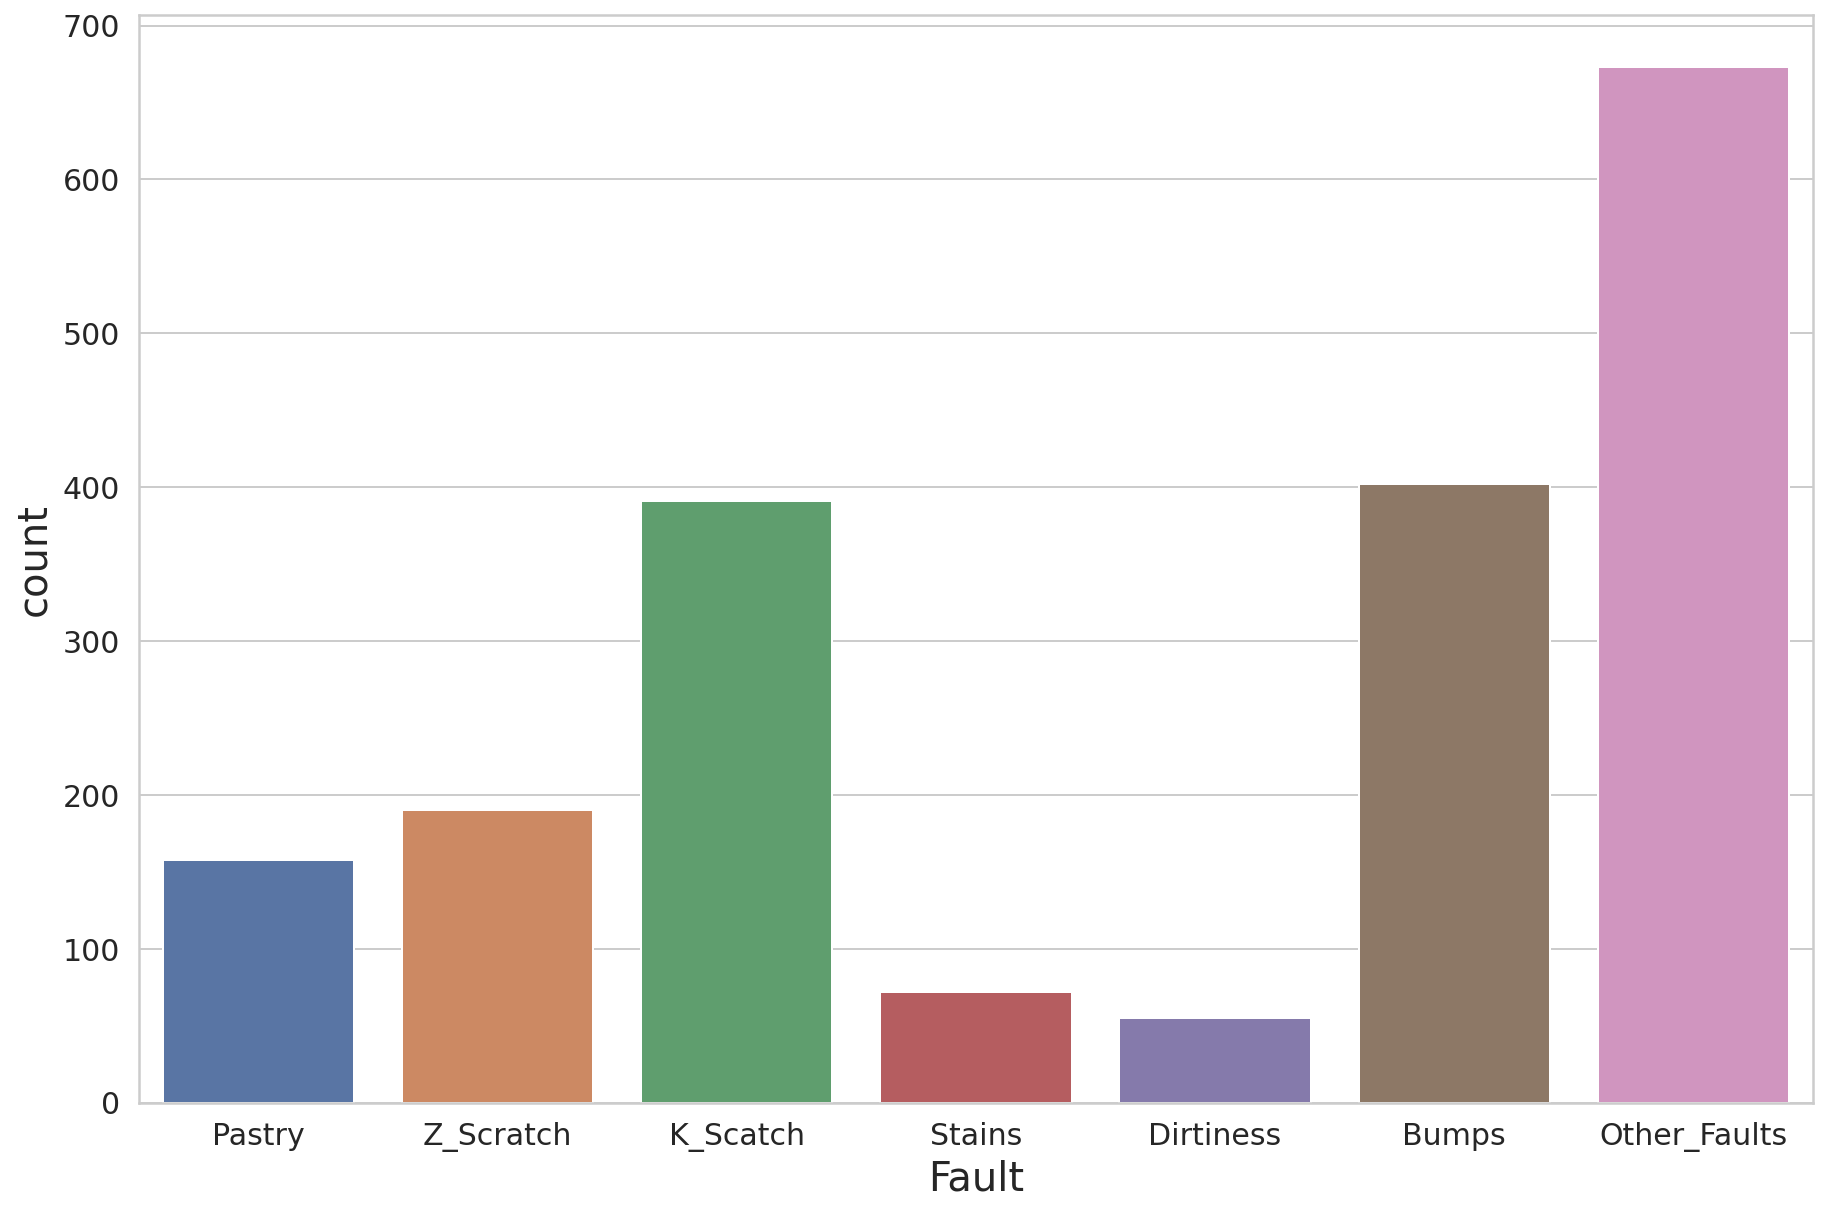

In [93]:
# Count members of each class
for name in classNames:
    a = df[[name]]
    num_class = sum(sum(np.asarray(df[[name]])))
    print('Number of plates with defect '+ name + ' is ' + str(num_class))

# Plot histogram with Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Fault", data=yl)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis = 'x', labelsize = 15)
ax.tick_params(axis = 'y', labelsize = 15)

This dataset is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier.
To make it easy to understand if a classifier were to train with this data set trying to achieve the best accuracy possible it would most likely label every transaction as a non-fraud

To answer this problem we could use the oversampling principle or the undersampling principle
The undersampling principle should be used only if we can be sure that the selected few tuples (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset.

### Correlation of features

In [7]:
X_corr = X.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

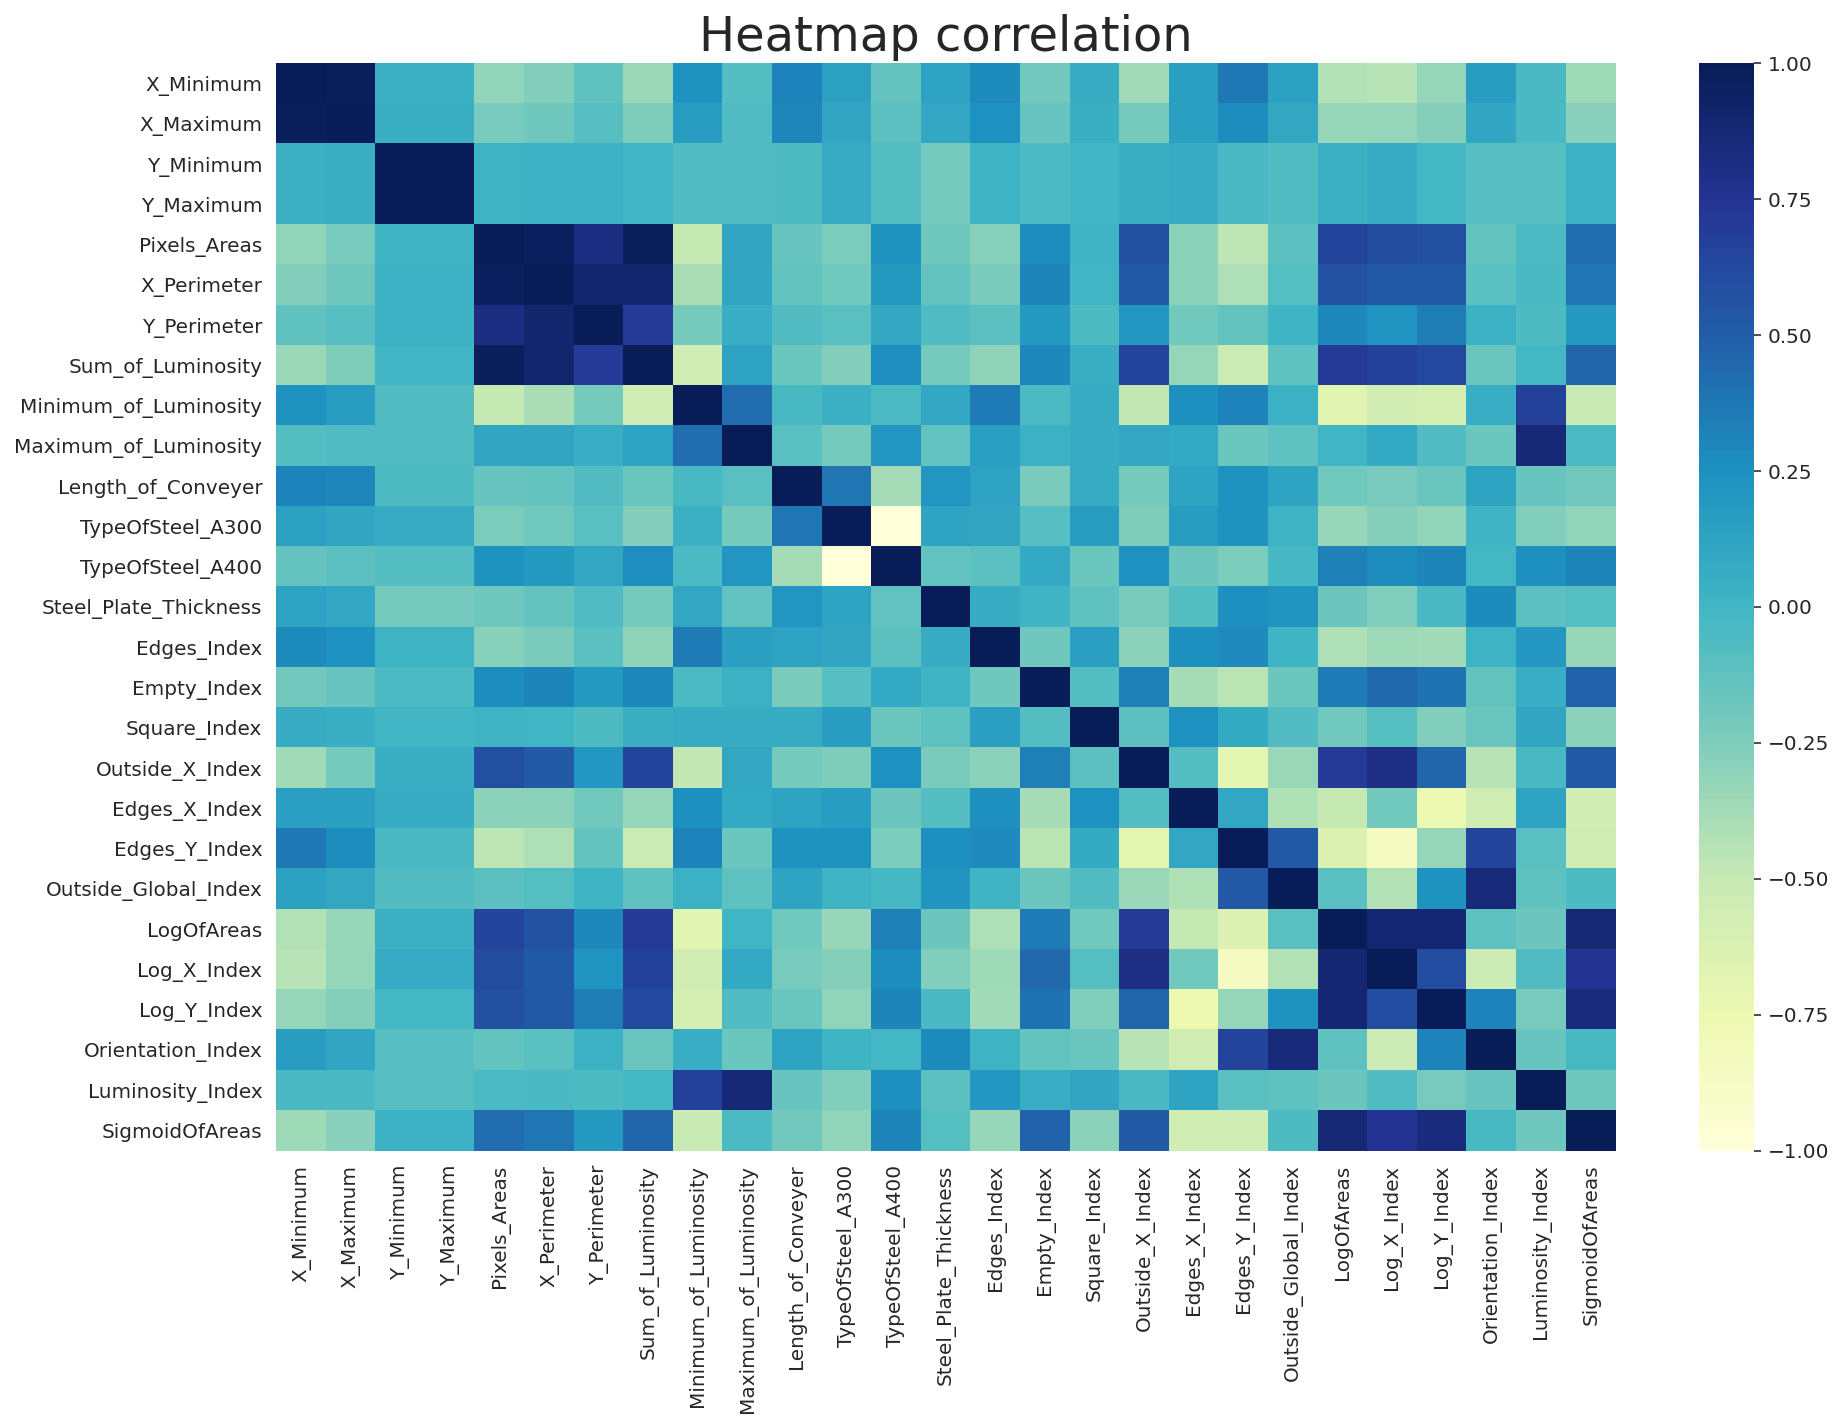

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(X_corr, cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

As we can notice, some of the features are correlated with each other. 

For example:
- X_Minimum is highly correlated with X_Maximum
- Y_Minimum is highly correlated with Y_Maximum
- Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity are all correlated
- TypeOfSteel_A300 and TypeOfSteel_A400 have inverse correlation: it means these are not separate features, but rather a single categorical TypeOfSteel that can either have the value A300 or A400. 
TODO: We could drop one of these two features

What can generally be done on a massive dataset is a dimension reduction.
By picking the most important dimensions, there is the possibility of explaining most of the problem, thus gaining
a considerable amount of time while preventing the accuracy to drop too much.

rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

# Data Preparation

OVERSAMPLING

One way to do oversampling is to oversample the under-represented class tuples until we attain a correct proportion between the class. Rather than simply oversampling, we will use the SMOTE algorithm.

In [52]:
# First we convert our frames into arrays
X_ar = np.asarray(X)
yl_ar = np.asarray(yl)

# Then we convert the string labels into integers using LabelEncoder sklearn.preprocessing
le = preprocessing.LabelEncoder()
y_ar = le.fit_transform(yl_ar)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Before OverSampling, counts of label '0': 402
Before OverSampling, counts of label '1': 55
Before OverSampling, counts of label '2': 391
Before OverSampling, counts of label '3': 673
Before OverSampling, counts of label '4': 158
Before OverSampling, counts of label '5': 72
Before OverSampling, counts of label '6': 190

After OverSampling, the shape of train_X: (4711, 27)
After OverSampling, the shape of train_y: (4711,) 



After OverSampling, counts of label '0': 673
After OverSampling, counts of label '1': 673
After OverSampling, counts of label '2': 673
After OverSampling, counts of label '3': 673
After OverSampling, counts of label '4': 673
After OverSampling, counts of label '5': 673
After OverSampling, counts of label '6': 673


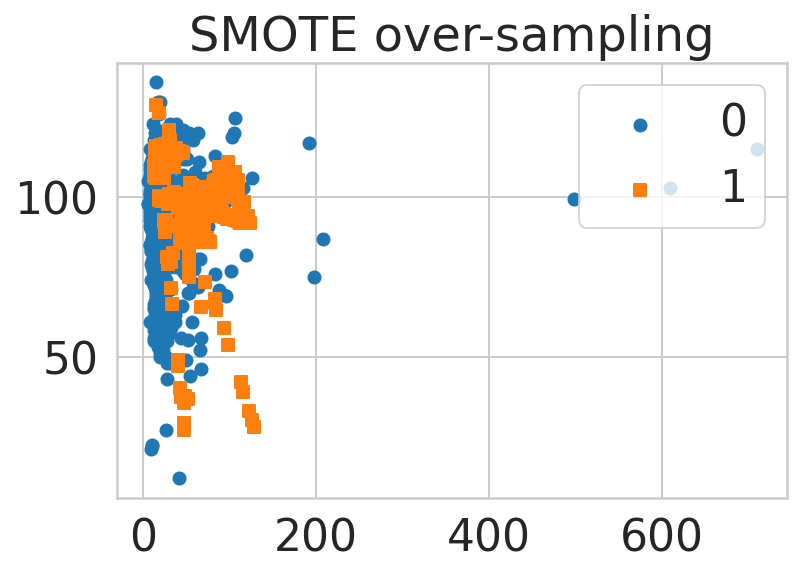

In [56]:
# Oversampling of whole dataset

for i in np.unique(y_ar):
    print(("Before OverSampling, counts of label '" + str(i) + "': {}").format(sum(y_ar==i)))


sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_resample(X_ar, y_ar)


print('\nAfter OverSampling, the shape of train_X: {}'.format(X_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_sm.shape))

for i in np.unique(y_sm):
    print(("After OverSampling, counts of label '" + str(i) + "': {}").format(sum(y_sm==i)))


def plot_2d_space(X, y, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[l == y, 5],
            X[l == y, 8],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')


In [58]:
# We split it into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm)


In [60]:
#scale training and test features with MinMaxScaler
scaler = preprocessing.MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

classSorted = sorted(classNames) #sort class names to comply with labelEncoder order

# Linear SVM Classifier

So now, we'll use a SVM model classifier, with the scikit-learn library.

In [64]:
linSVM = svm.LinearSVC(verbose=1) # LinearSVC is a much faster implementation of SVC with linear kernel

In [65]:
# Fit classifier
linSVM.fit(X_train_scale, y_train) # Then we train our model, with our balanced data train.

[LibLinear]

LinearSVC(verbose=1)

## Confusion Matrix

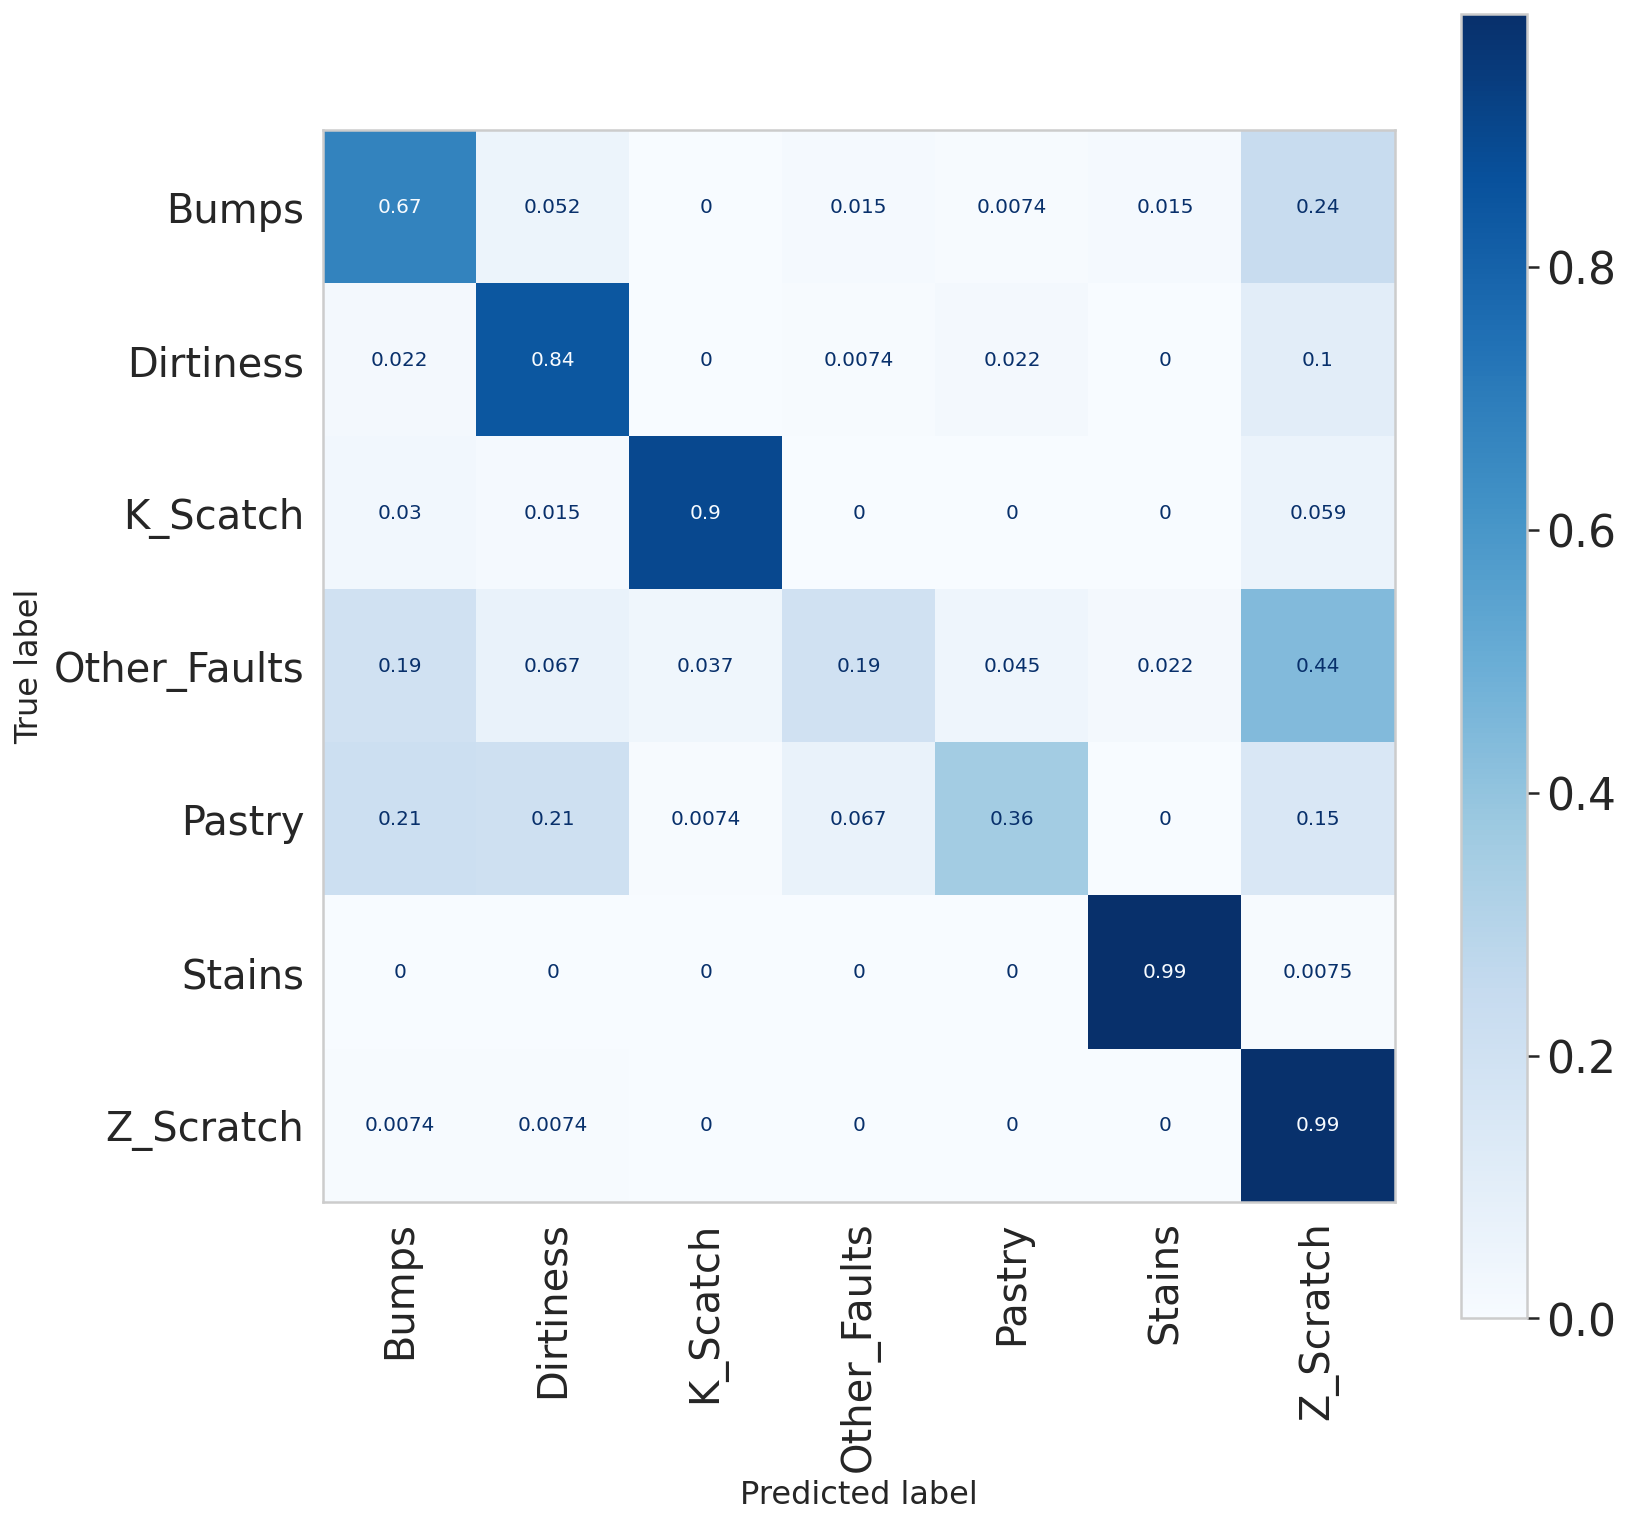

In [66]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.grid(False)

disp = metrics.plot_confusion_matrix(linSVM, X_test_scale, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 display_labels=classSorted,
                                 ax=ax)

ax.tick_params(axis = 'x', labelsize = 20, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize = 20)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

In [132]:
# Find predictions and plot accuracy
predictions_linSVM = linSVM.predict(X_test_scale)
accuracy_linSVM=metrics.accuracy_score(y_test, predictions_linSVM)
accuracy_linSVM

0.7062566277836692

In this case we are gonna try to minimize the number of errors in our prediction results. Errors are on the anti-diagonal of the confusion matrix.  But we can infer that being wrong about an actual fraud is far worse than being wrong about a non-fraud transaction. 

That is why  using the accuracy as only classification criterion could be considered unthoughtful. 
During the remaining part of this study our criterion will consider precision on the real fraud 4 times more important than the general accuracy.
Even though the final tested result is accuracy.

# SVM Classifier

In [74]:
# SVM define and fit
clSVM = svm.SVC(verbose=1) # LinearSVC is a much faster implementation of SVC with linear kernel
clSVM.fit(X_train_scale, y_train) # Then we train our model, with our balanced data train.

[LibSVM]

SVC(verbose=1)

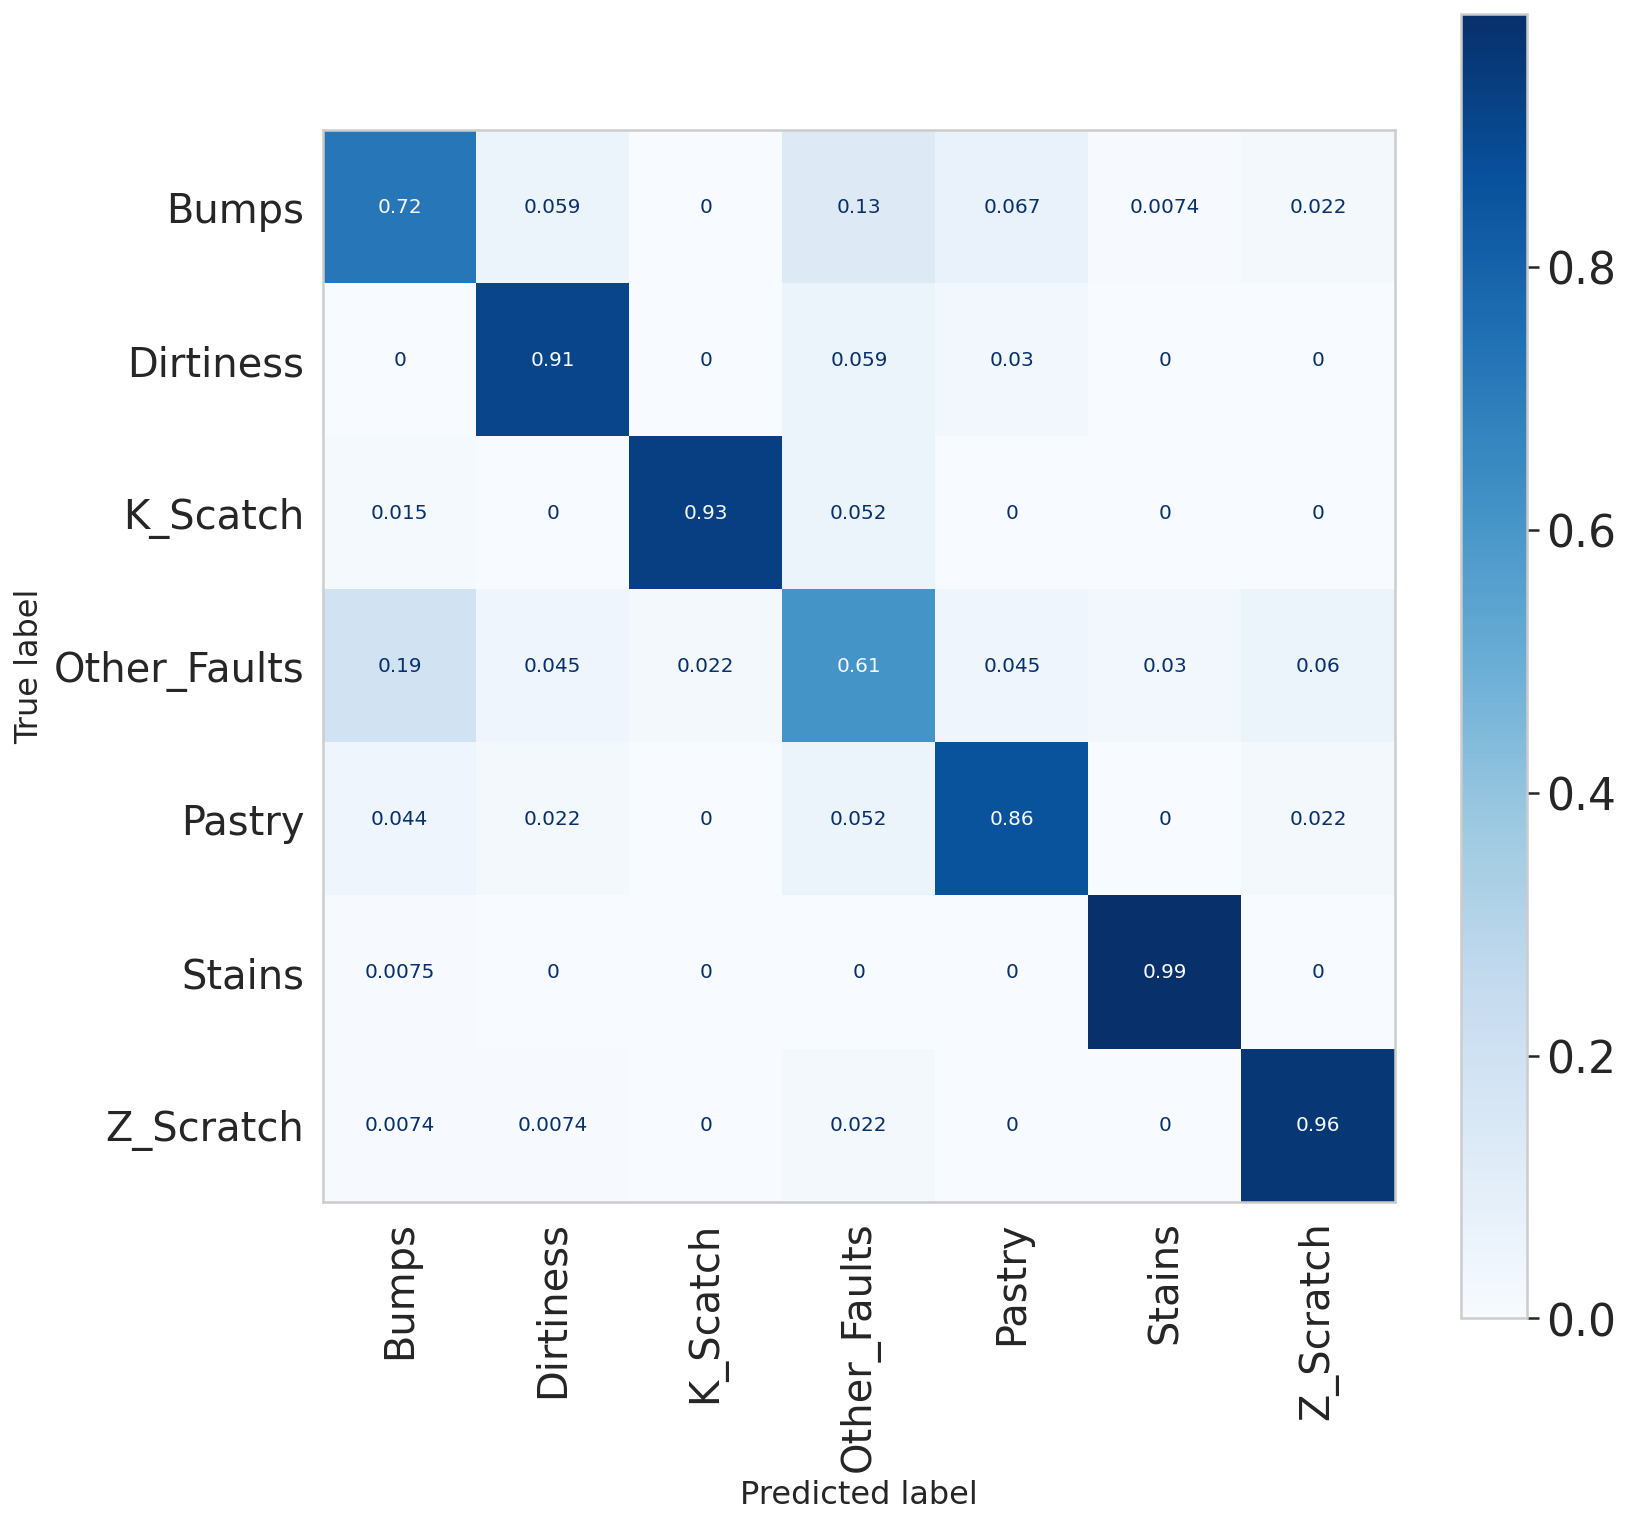

In [77]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.grid(False)

disp = metrics.plot_confusion_matrix(clSVM, X_test_scale, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 display_labels=classSorted,
                                 ax=ax)

ax.tick_params(axis = 'x', labelsize = 20, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize = 20)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

In [133]:
# Find predictions and plot accuracy
predictions_SVM = clSVM.predict(X_test_scale)
accuracy_SVM=metrics.accuracy_score(y_test, predictions_SVM)
accuracy_SVM

0.855779427359491

# Logistic regression

So now, we'll use a Logistic Regression model, with the scikit-learn library.

In [79]:
LR = LogisticRegression(solver='liblinear', random_state=0)

In [80]:
# Fit classifier
LR.fit(X_train_scale, y_train) # Model fitting is the process of determining the coefficients 𝑏₀, 𝑏₁, …, 𝑏ᵣ that correspond to the best value of the cost function. We train our model, with our balanced data train.

LogisticRegression(random_state=0, solver='liblinear')

## Confusion Matrix

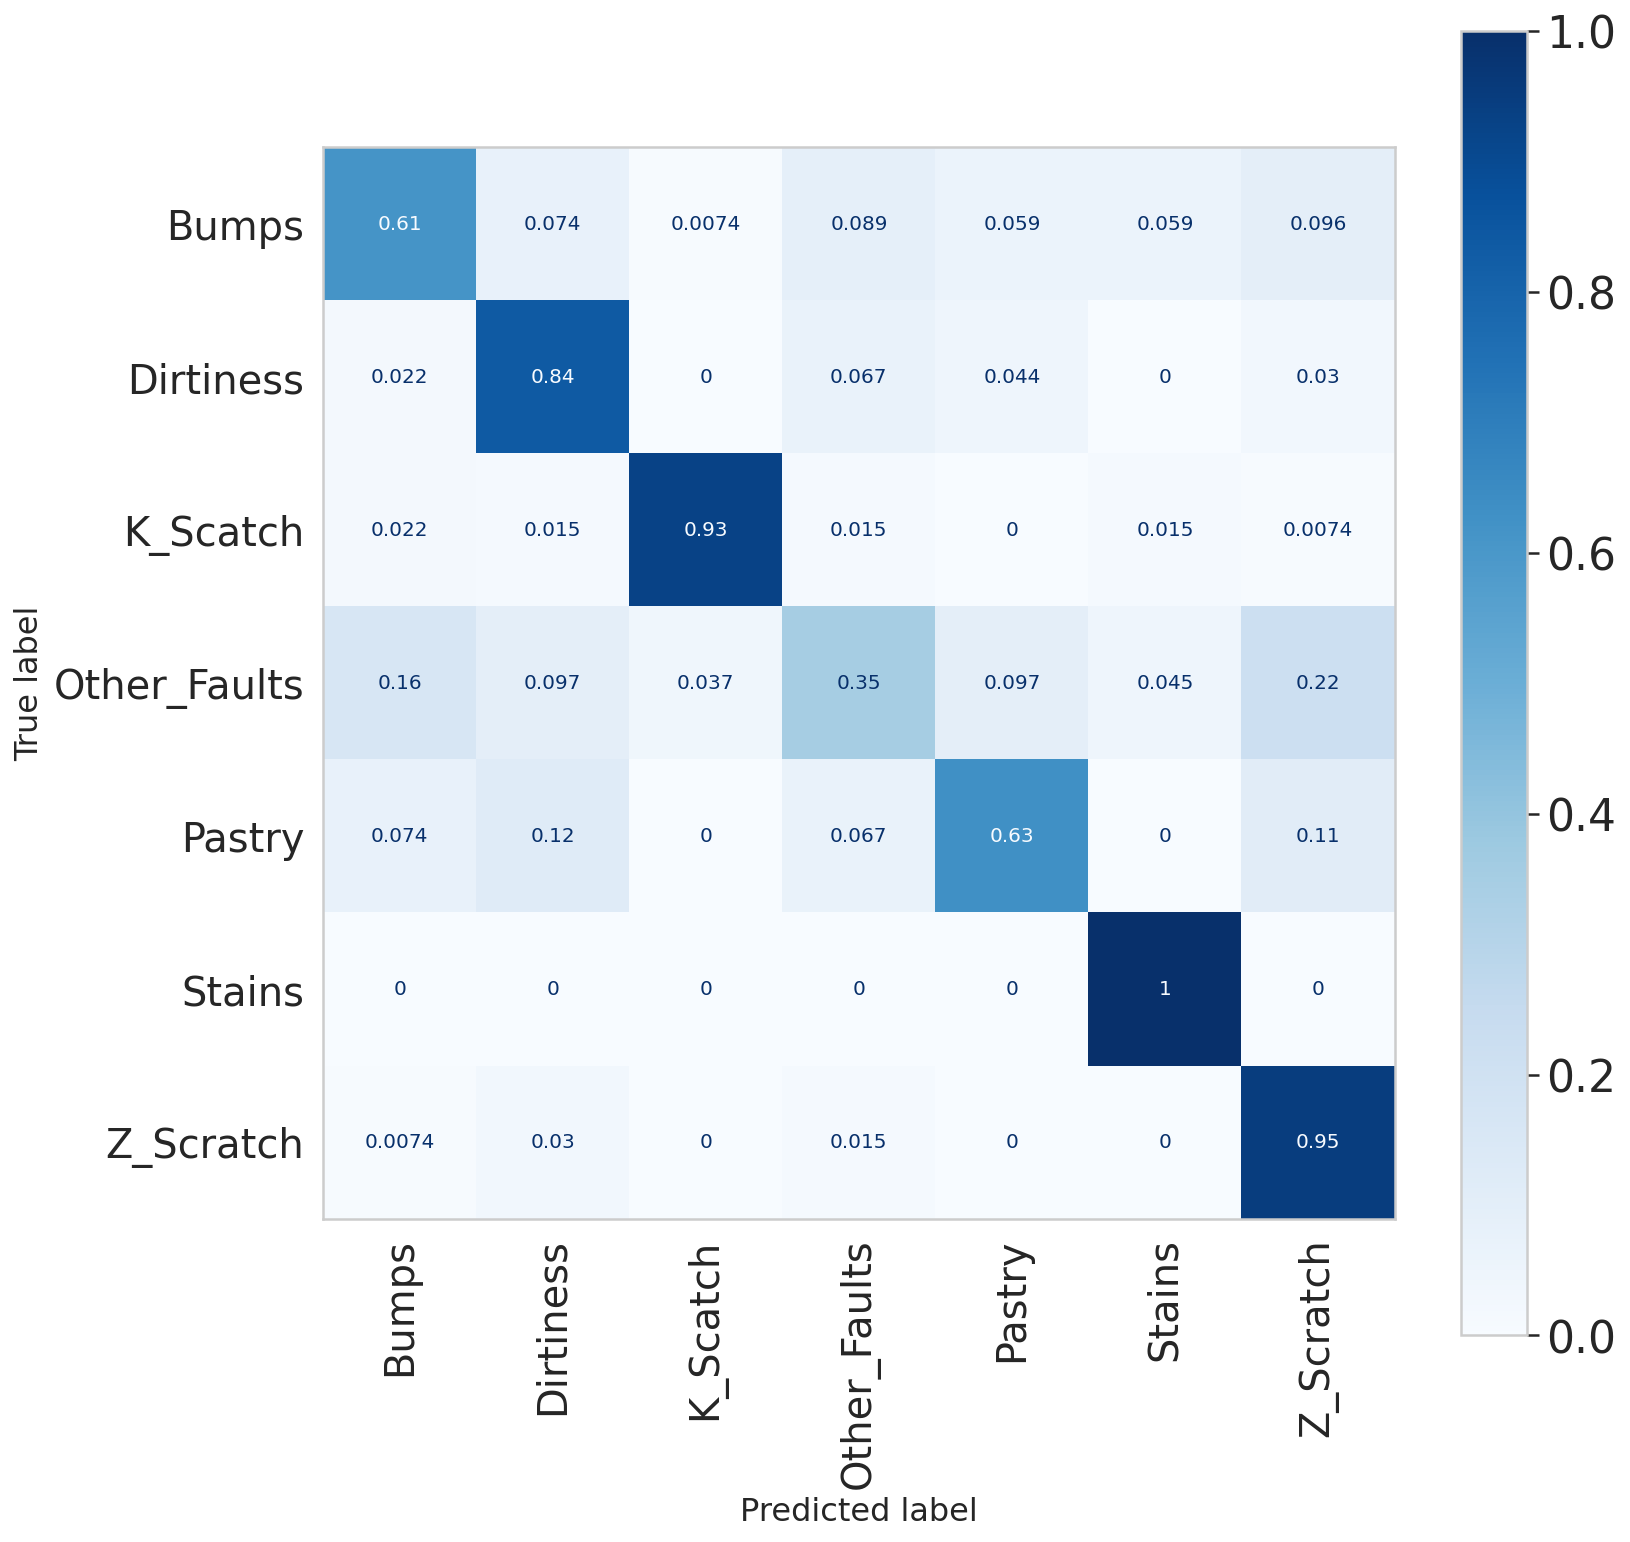

In [81]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.grid(False)

disp = metrics.plot_confusion_matrix(LR, X_test_scale, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 display_labels=classSorted,
                                 ax=ax)

ax.tick_params(axis = 'x', labelsize = 20, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize = 20)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

In [134]:
# Find predictions and plot accuracy
predictions_LR = LR.predict(X_test_scale)
accuracy_LR=metrics.accuracy_score(y_test, predictions_LR)
accuracy_LR

0.7582184517497349

# Decision Tree

So now, we'll use a Decision Tree model, with the scikit-learn library.

In [84]:
# pruning tree
# path = TreeClassifier.cost_complexity_pruning_path(X_train, y_train)
# path


In [87]:
# fit pruned tree
clTree = tree.DecisionTreeClassifier(ccp_alpha=0.02)
clTree.fit(X_train_scale, y_train)

DecisionTreeClassifier(ccp_alpha=0.02)

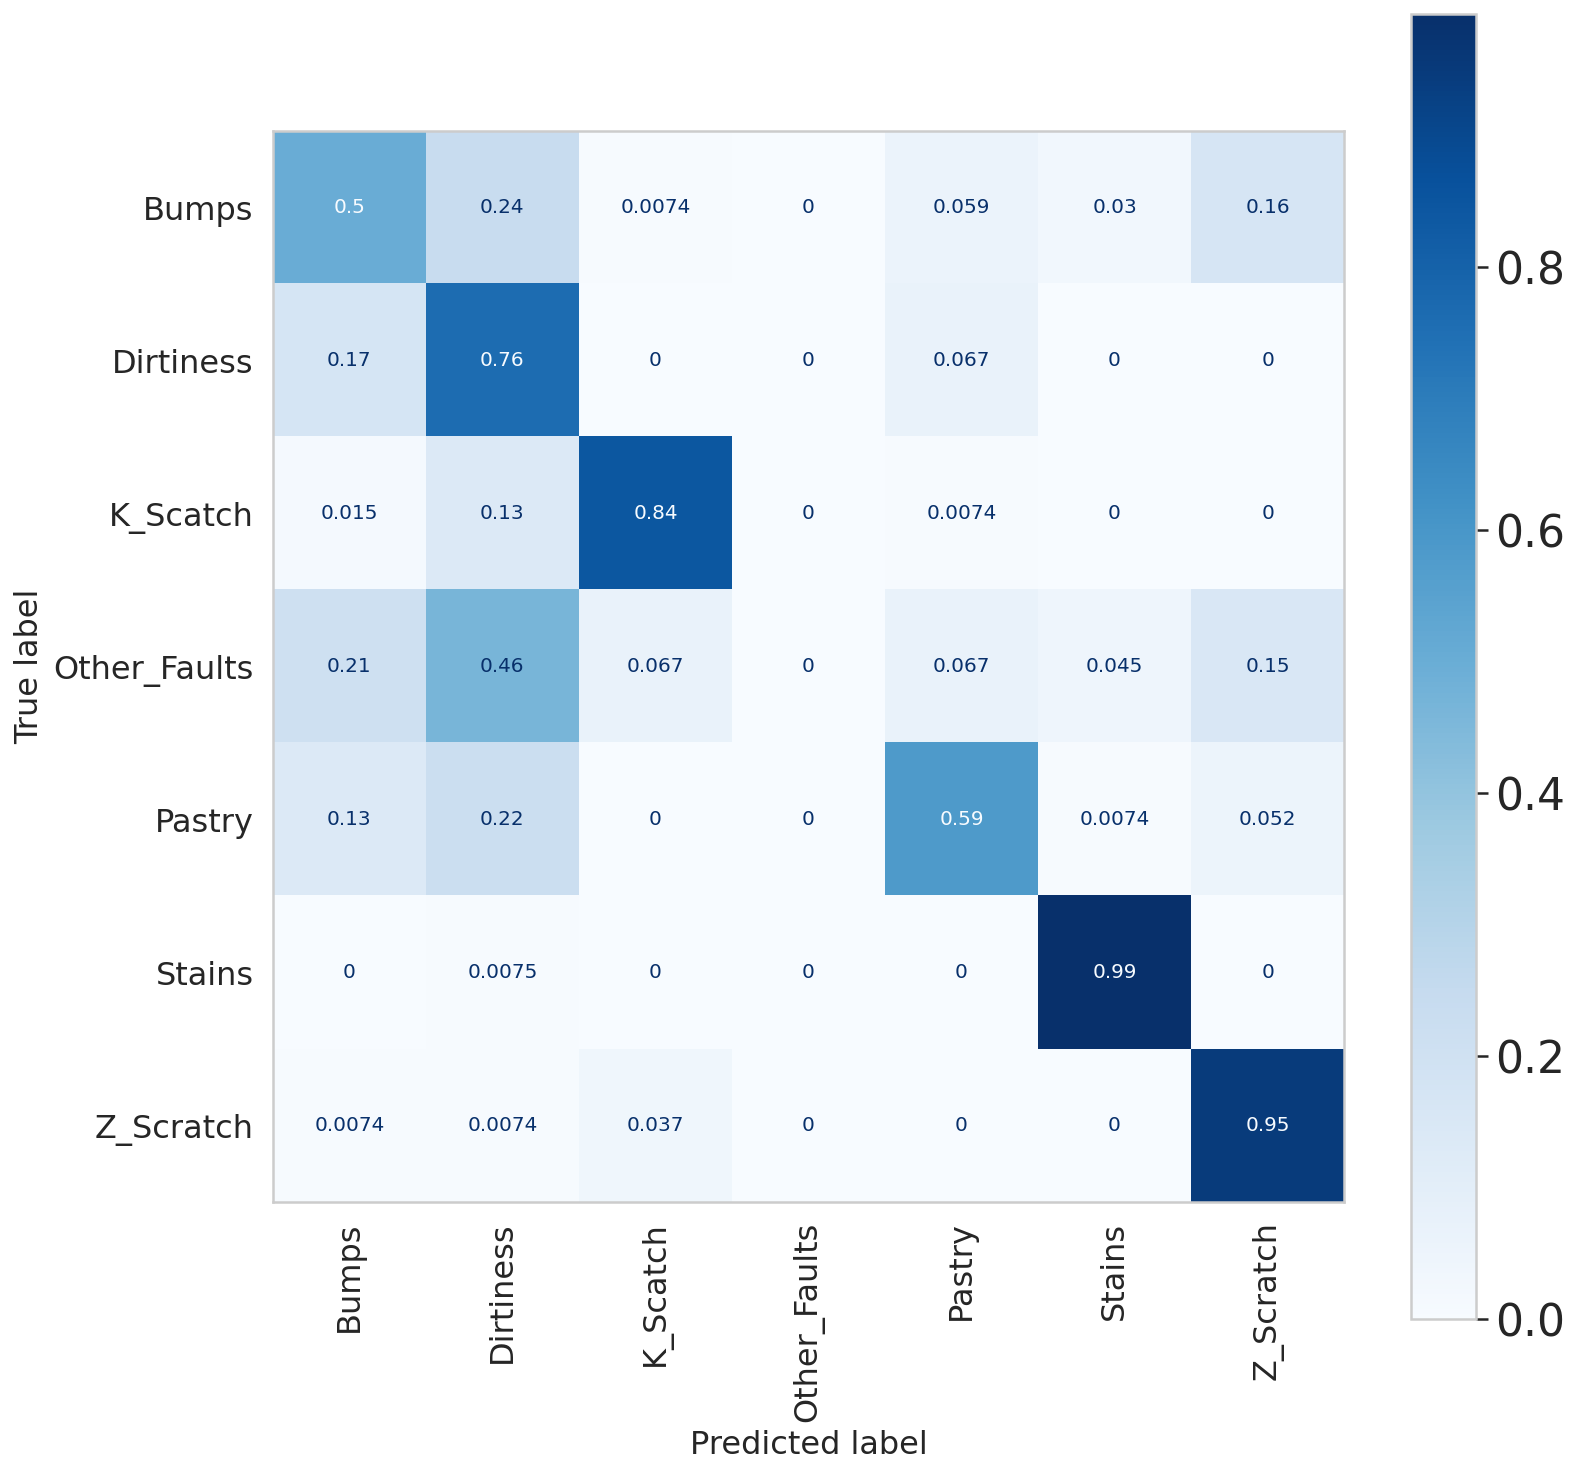

In [90]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.grid(False)

disp = metrics.plot_confusion_matrix(clTree, X_test_scale, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 display_labels=classSorted,
                                 ax=ax)

ax.tick_params(axis = 'x', labelsize = 16, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize = 16)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

In [135]:
# Find predictions and plot accuracy
predictions_Tree = clTree.predict(X_test_scale)
accuracy_tree=metrics.accuracy_score(y_test, predictions_Tree)
accuracy_tree

0.662778366914104

# KNN

In [128]:
# KNN define and fit
KNN = KNC(10) #10 nearest neighbours
KNN.fit(X_train_scale, y_train) # Then we train our model, with our balanced data train.

KNeighborsClassifier(n_neighbors=10)

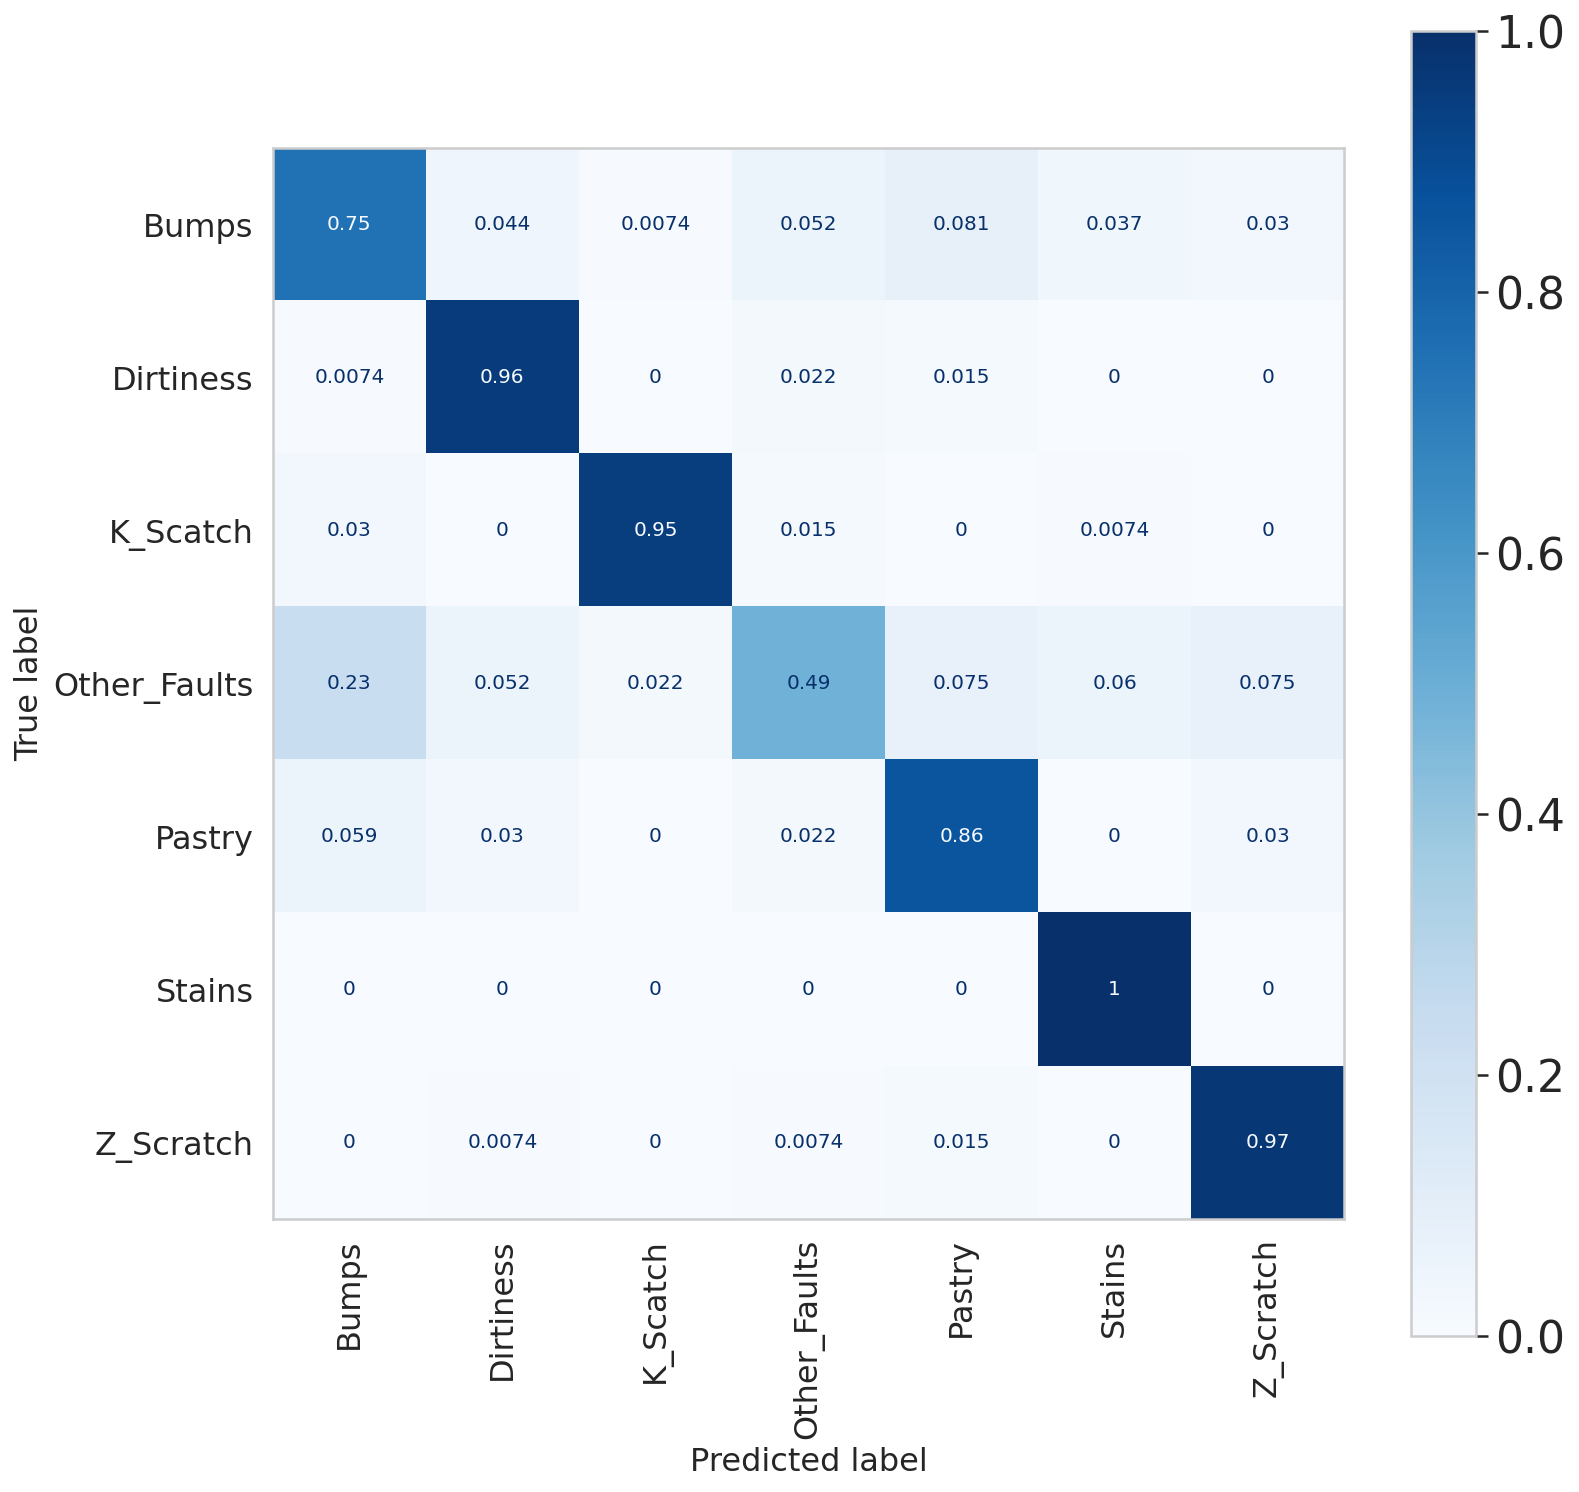

In [129]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.grid(False)

disp = metrics.plot_confusion_matrix(KNN, X_test_scale, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 display_labels=classSorted,
                                 ax=ax)

ax.tick_params(axis = 'x', labelsize = 16, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize = 16)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

In [136]:
# Find predictions and plot accuracy
predictions_KNN = KNN.predict(X_test_scale)
accuracy_KNN=metrics.accuracy_score(y_test, predictions_KNN)
accuracy_KNN

0.8525980911983033

KNN Seems to score a very high accuracy: this is likely due to the fact that SMOTE is a nearest-neighbour based technique.
Hence the high classification score

# Random forest

In [125]:
# KNN define and fit
clRF = RF(100) # 100 trees
clRF.fit(X_train_scale, y_train) # Then we train our model, with our balanced data train.

RandomForestClassifier()

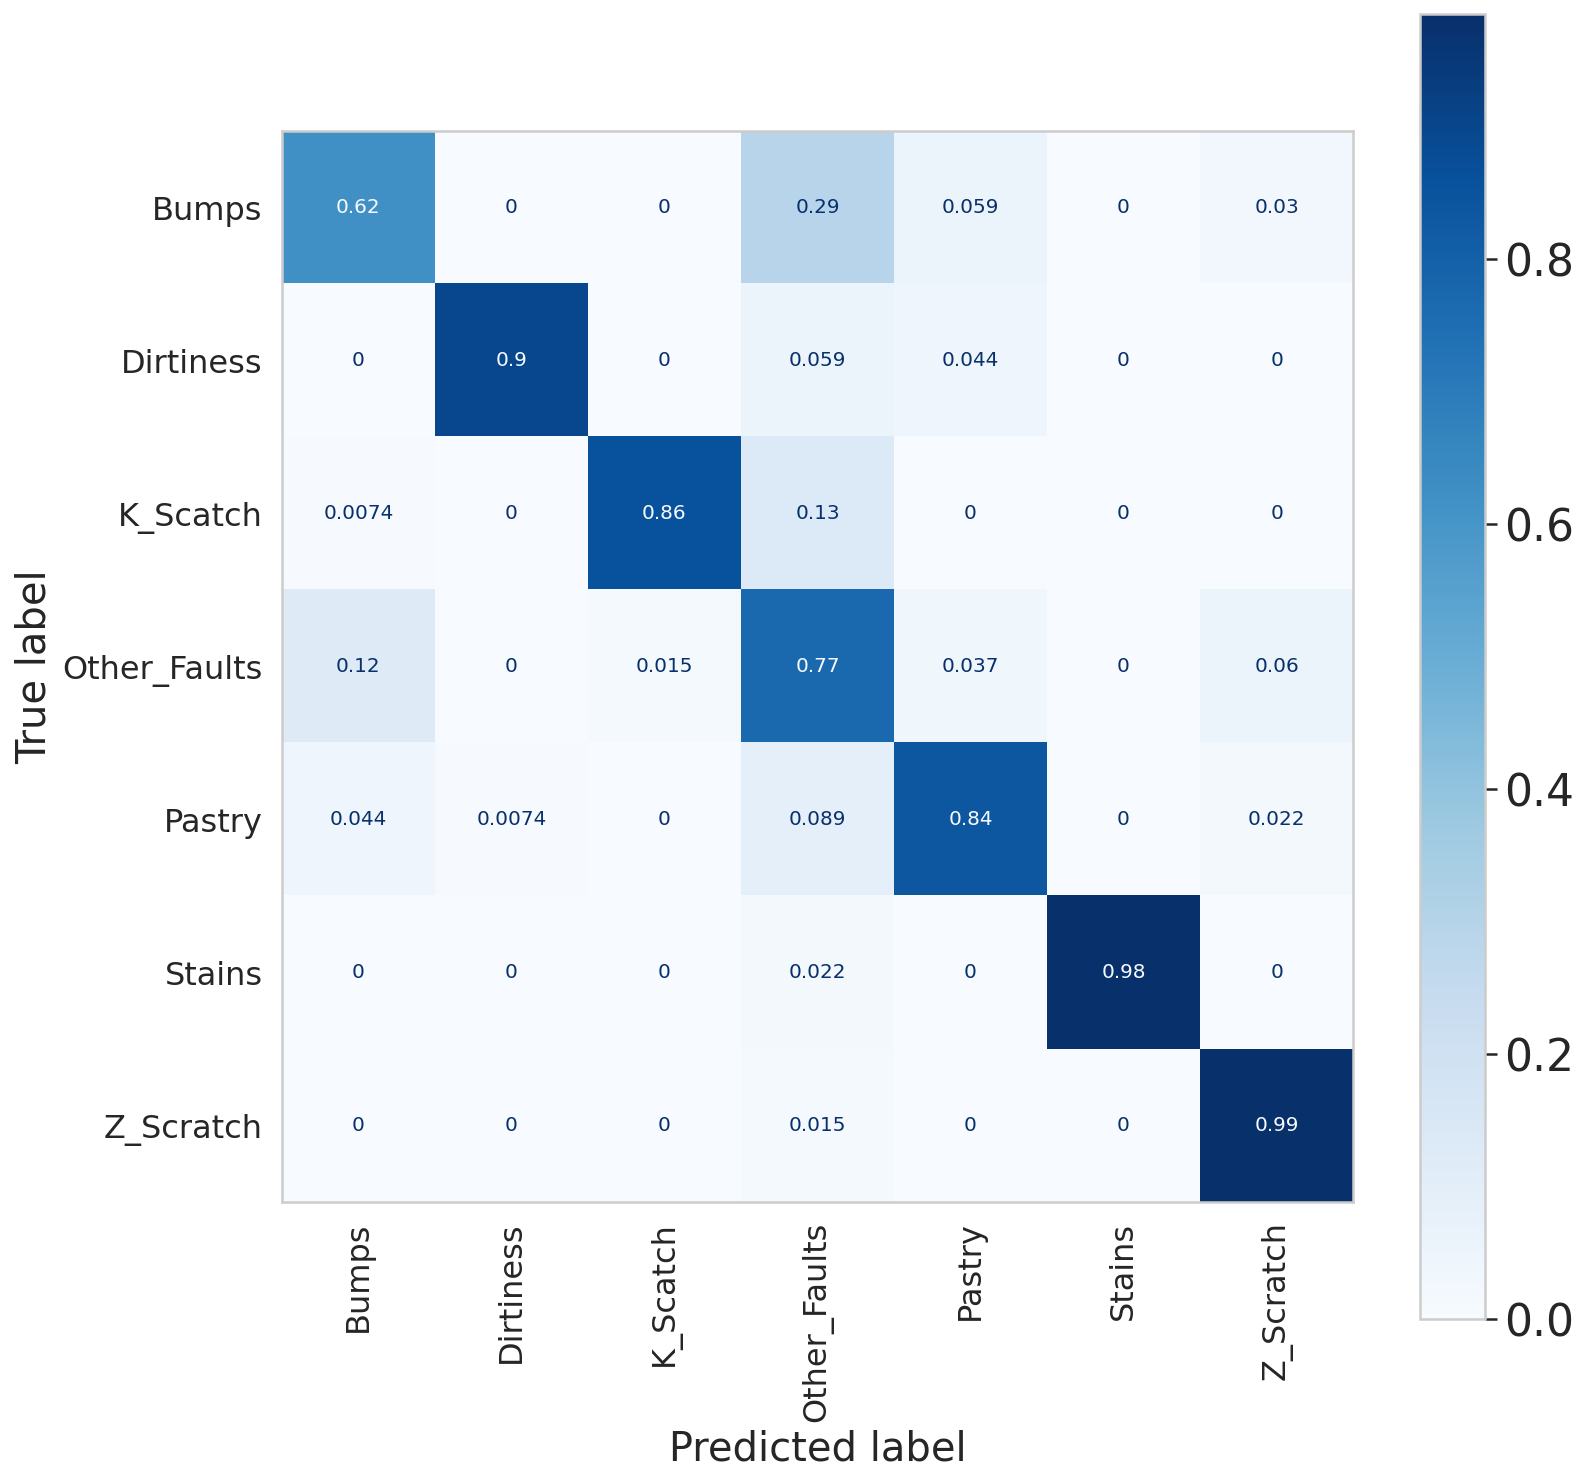

In [131]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.grid(False)

disp = metrics.plot_confusion_matrix(clRF, X_test_scale, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 display_labels=classSorted,
                                 ax=ax)

ax.tick_params(axis = 'x', labelsize = 16, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize = 16)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

In [137]:
# Find predictions and plot accuracy
predictions_RF = clRF.predict(X_test_scale)
accuracy_RF=metrics.accuracy_score(y_test, predictions_RF)
accuracy_RF

0.8494167550371156

# Algorithm comparison

Text(0.5, 1.0, 'Classification accuracy on test set for various ML algorithms')

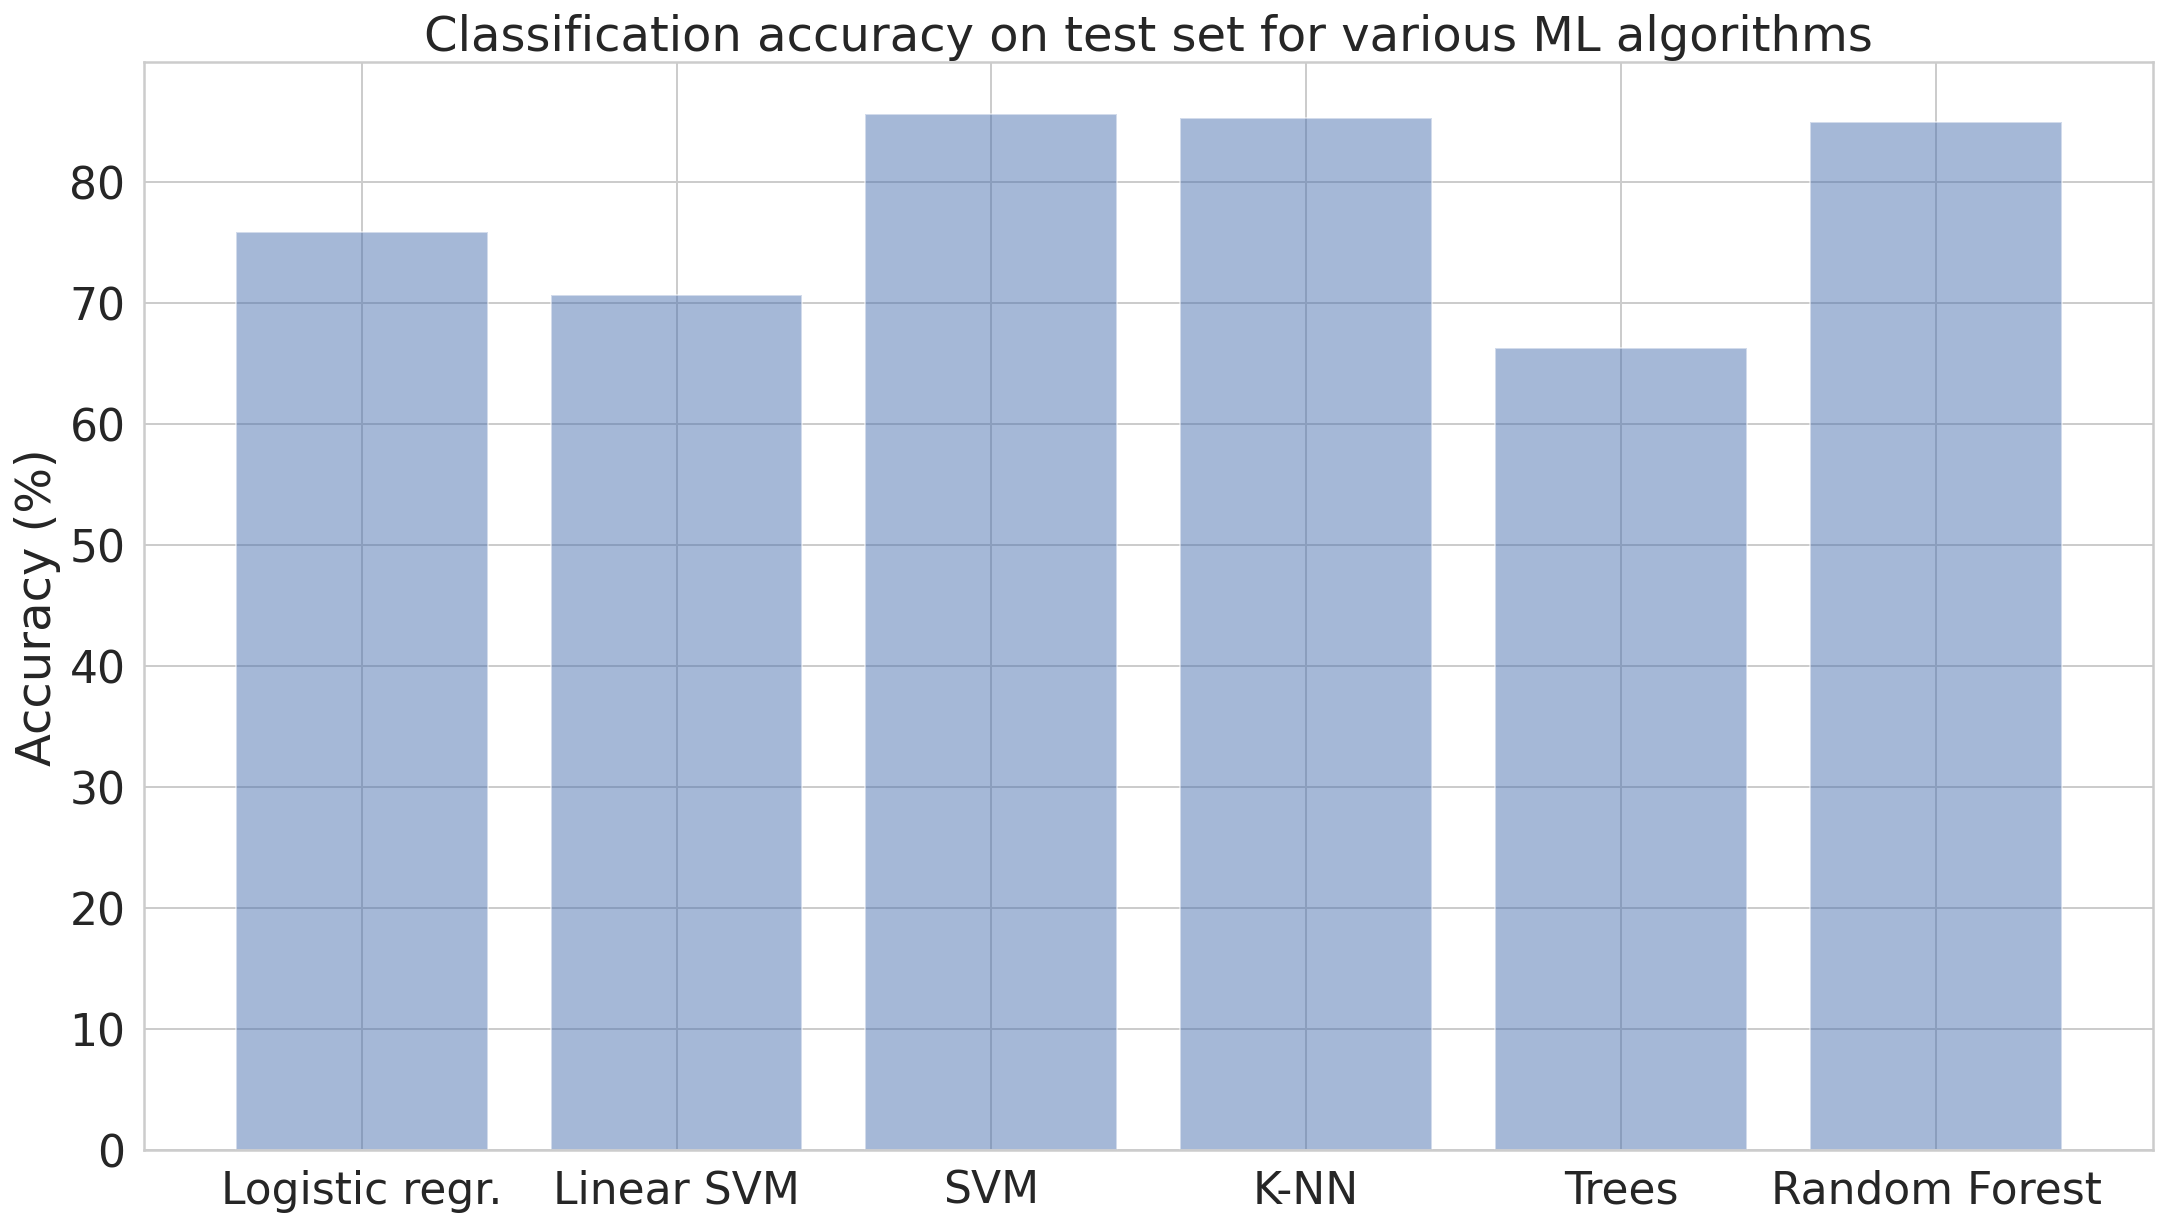

In [143]:
objects = ('Logistic regr.', 'Linear SVM', 'SVM', 'K-NN', 'Trees','Random Forest')
obj = np.arange(len(objects))
SCORES = [accuracy_LR*100, accuracy_linSVM*100, accuracy_SVM*100, accuracy_KNN*100, accuracy_tree*100, accuracy_RF*100]

plt.figure(figsize=(18,10))
plt.grid(True)

plt.bar(obj, SCORES, align='center', alpha=0.5)
plt.xticks(obj, objects)
plt.ylabel('Accuracy (%)')
plt.title('Classification accuracy on test set for various ML algorithms')